CS6120 NLP<br>
Assignment 4 - Explore POS tagging using nltk<br>
Wing Man Casca, Kwok

In [3]:
#download the necessary corpora
nltk.download() 

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize   # import functions that split text into sentences and split sentences into words

In [5]:
sentences = sent_tokenize("Fish sleep. Cats sleep more.")
words = word_tokenize("Fish sleep.")

for i, sentence in enumerate(sentences):
    print(f'Sentence {i}: {sentence}')
    
    words = nltk.word_tokenize(sentence)  
    tags = nltk.pos_tag(words) 
    
    for word, tag in tags:
        print(f'{word}: {tag}')
        
    print()

Sentence 0: Fish sleep.
Fish: JJ
sleep: NN
.: .

Sentence 1: Cats sleep more.
Cats: NNS
sleep: VBP
more: JJR
.: .



Answers for 2a<br>
My own sentence that is tagged incorrectly by the POS tagger is "An eagle flies to look for preys.". Below shows the tags output by the POS tagger, the tag of "flies" should be VB as "flies" is the action an eagle takes and should be a verb.<br>

In [19]:
sentences = sent_tokenize("An eagle flies to look for preys.")
for i, sentence in enumerate(sentences):
    print(f'Sentence {i}: {sentence}')
    
    words = nltk.word_tokenize(sentence)  
    tags = nltk.pos_tag(words) 
    
    for word, tag in tags:
        print(f'{word}: {tag}')
        
    print()

Sentence 0: An eagle flies to look for preys.
An: DT
eagle: NN
flies: NNS
to: TO
look: VB
for: IN
preys: NNS
.: .



Answers for 2b<br>


In [50]:
# nltk.corpus.brown.tagged_words() returns words from the Brown Corpus and POS tags.  It represents ground truth
# nltk.pos_tag() returns a pre-trained POS tagger to predict text
brown_tagging = nltk.corpus.brown.tagged_words(tagset='universal') 
brown_tagged_words = [items[0] for items in brown_tagging]

pos_tagging = nltk.pos_tag(brown_tagged_words_list, tagset='universal')

# Create a confusion matrix to analyze POS tag predictions 
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix([items[1] for items in brown_tagging], [items[1] for items in pos_tagging])

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP')]
brown_tagged_words_list ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of'] 

[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'NOUN'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP')] 



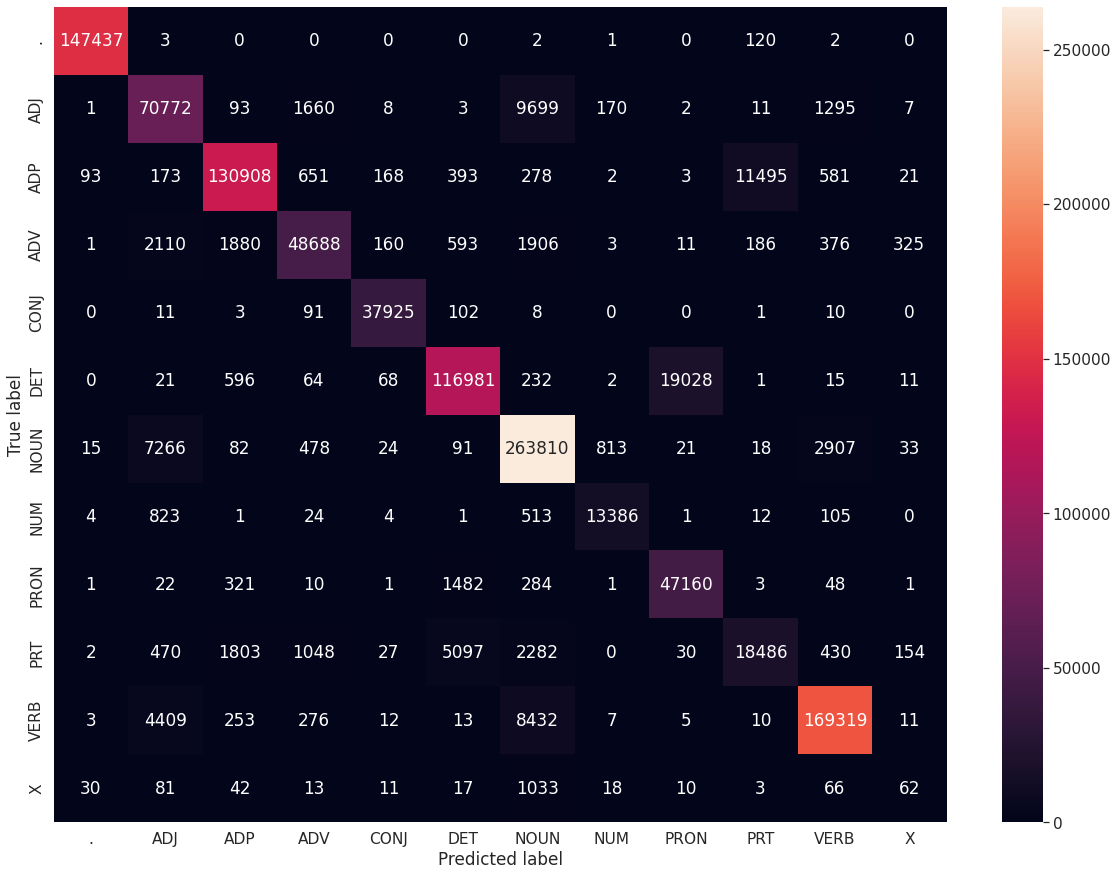

In [65]:
#plot the confusion matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

tag_to_index = {tag: i for i, tag in enumerate(sorted(set(tag for brown_tagging, tag in pos_tagging)))}

sns.set(font_scale=1.4)
plt.subplots(figsize=(20,15))
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=sorted(tag_to_index), yticklabels=sorted(tag_to_index))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

As illustrated in 2a, the word "flies", as a word with multiple meanings could cause ambiguity.  The confusion matrix has demonstrated the phenomenon, where a true label as a verb was predicted as a noun with 8432 entries.  Nouns are mostly predicted accurately.